(ch:getting_started_with_neural_networks)=
# 신경망 활용 처음부터 끝까지: 분류와 회귀

**감사의 글**

아래 내용은 프랑소와 숄레의 
[Deep Learning with Python(2판)](https://github.com/fchollet/deep-learning-with-python-notebooks)의 
소스코드 내용을 참고해서 작성되었습니다.
자료를 공개한 저자에게 진심어린 감사를 전합니다.

**소스코드**

여기서 언급되는 코드를
[(구글 코랩) 신경망 활용 처음부터 끝까지: 분류와 회귀](https://colab.research.google.com/github/codingalzi/dlp2/blob/master/notebooks/NB-getting_started_with_neural_networks.ipynb)에서 
직접 실행할 수 있다.

**슬라이드**

본문 내용을 요약한 [슬라이드](https://github.com/codingalzi/dlp2/raw/master/slides/slides-getting_started_with_neural_networks.pdf)를 다운로드할 수 있다.

**주요 내용**

세 종류의 문제를 해결하는 모델을 실전 데이터셋을 이용하여 훈련시키는 방법을 소개한다.

- 이진 분류 신경망 모델: 영화 후기 분류
- 다중 클래스 분류 신경망 모델: 뉴스 기사 분류
- 회귀 신경망 모델: 주택 가격 예측

**머신러닝 주요 용어**

아래 용어의 정의를 명확히 알아야 한다.

| 한글 | 영어 | 뜻 |
| :--- | :--- | :--- |
| 샘플, 입력값 | sample, input | 모델 훈련에 사용되는 데이터 |
| 예측값, 출력값 | prediction, output | 모델이 계산한 예측값 |
| 타깃 | target | 모델이 맞춰야 하는 값 |
| 손실값, 비용, 예측 오차 | loss value | 타깃과 예측값 사이의 오차. 문제 유형에 따라 측정법 다름. |
| 손실 함수, 비용 함수| loss function | 손실값(비용)을 계산하는 함수. |
| 클래스 | class | 분류 모델에서 각각의 샘플이 속하는 범주(클래스) |
| 라벨 | label | 분류 모델에서 타깃 대신 사용하는 표현 |
| 이진 분류 | binary classification | 양성/음성, 긍정/부정 등 샘플을 두 개의 클래스로 분류. |
| 다중 클래스 분류 | multiclass classification | 샘플을 세 개 이상의 클래스로 분류. 손글씨 숫자 분류 등. |
| 다중 라벨 분류 | multilabel classification | 샘플에 대해 두 종류 이상의 라벨을 지정하는 분류. 한 장의 사진에 강아지, 고양이, 토끼 등 여러 종의 포함 여부 확인. 각각의 종에 대해 범부를 맞춰야 함. |
| (스칼라) 회귀 | (scalar) regression | 샘플 별로 하나의 값만 예측하기. 주택 가격 예측 등. |
| 벡터 회귀 | vector regression | 샘플 별로 두 종류 이상의 값 예측하기. 네모 상자의 좌표 등. |
| 배치 | batch | 보통 16, 32, 64, 128 등의 개수의 샘플로 구성된 묶음(배치). 훈련 루프의 스텝에 사용되는 훈련셋. |

(sec:imdb)=
## 영화 후기: 이진 분류

영화 후기의 긍정/부정 여부를 판단하는 이진 분류 모델을 구성한다.

### 데이터 준비: IMDB 데이터셋

긍정 후기와 부정 후기 각각 25,000개씩 총 50,000개의 영화 후기 샘플로 구성되었으며
[IMDB(Internet Moview Database)](https://www.imdb.com/) 영화 후기 사이트에서
구한 데이터셋이다.

케라스의 `imdb` 모듈의 `load_data()` 함수로 불러올 수 있는 IMDB 데이터셋은
이미 훈련셋과 테스트셋으로 구분되어 있다.

- `train_data`: 훈련용 입력 데이터셋. 25,000개의 리스트로 구성된 1차원 어레이.
- `train_labels`: 훈련용 타깃 데이터셋. 0과 1로 구성된 길이가 25,000인 1차원 어레이.
- `test_data`: 테스트용 입력 데이터셋. 25,000개의 리스트로 구성된 1차원 어레이.
- `test_labels`: 테스트용 타깃 데이터셋. 0과 1로 구성된 길이가 25,000인 1차원 어레이.

```python
>>> from tensorflow.keras.datasets import imdb
>>> (train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
```

후기 데이터셋 전체에서 원래 총 88,585개의 단어가 최소 한 번 이상 사용되지만 가장 많이 사용되는
10,000개 단어 이외에는 사용 빈도가 너무 낮다.
그런 단어는 클래스 분류 훈련에 별 도움이 되지 않거나 오히려 악형향을 끼치기도 한다.
따라서 그런 단어들은 무시하는 것이 좋다.
`imdb.load_data()` 함수의 `num_words=10000` 키워드 인자는
가장 많이 사용되는 10,000개의 이외의 단어는 특정 숫자로 처리하여
신경망 모델을 훈련시킬 때 무시되도록 한다.

:::{admonition} 케라스 제공 데이터셋
:class: note

[`tf.keras.datasets` 모듈](https://keras.io/api/datasets/)이 몇 개의 연습용 데이터셋을 제공한다.

- MNIST 손글씨 숫자 분류 데이터셋
- CIFAR10 작은 이미지 분류 데이터셋
- CIFAR100 작은 이미지 분류 데이터셋
- IMDB 영화 후기 감성 분류 데이터셋
- Reuters 단문 기사 주제 분류 데이터셋
- 패션 MNIST(Fashion MNIST) dataset
- 보스턴 주택 가격(Boston Housing price) 회귀 데이터셋

각 데이터셋을 담고 있는 객체의 `load_data()` 메서드를 이용하여 미리 구분된 훈련셋과 테스트셋을 넘파이 어레이로 불러올 수 있다.
:::

**데이터 살펴보기**

후기 샘플 각각에 사용되는 단어의 수는 일정하지 않다. 
즉 각 후기 문장의 길이가 일정하지 않다.
예를 들어, 훈련셋의 첫째 후기 문장은 218개의 단어로,
둘째 후기 문장은 189개의 단어로 구성된다.

```python
>>> len(train_data[0])
218
>>> len(train_data[1])
189
```

각각의 입력 샘플은 정수로 구성된 벡터, 즉 1차원 텐서다.
각각의 정수는 특정 단어를 가리킨다.
예를 들어, 530은 영화 후기에서 530번째로 많이 사용되는 어떤 단어를 가리킨다.

훈련셋의 0번 입력 샘플의 처음 10개 값은 다음과 같다.

```python
>>> train_data[0][:10]
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]
```

각 샘플의 라벨은 0(부정) 또는 1(긍정)이다.
예를 들어, 훈련셋 0번 샘플은 긍정 후기를 가리킨다.

```python
>>> train_labels[0]
1
```

:::{admonition} 영화 후기 내용
:class: tip

**모델 훈련을 위해 반드시 필요한 사항은 아니지만**
필요한 경우 단어와 정수(빈도) 사이의 관계를 담은 사전을 이용하여
후기 내용을 확인할 수 있다.

```python
>>> word_index = imdb.get_word_index()
```

`word_index`에 포함된 10개 항목을 확인하면 다음과 같다.

```python
>>> list(word_index.items()[:10]
('fawn', 34701)
('tsukino', 52006)
('nunnery', 52007)
('sonja', 16816)
('vani', 63951)
('woods', 1408)
('spiders', 16115)
('hanging', 2345)
('woody', 2289)
('trawling', 52008)
```

아래 코드는 첫째 후기의 내용을 확인한다.
단어 인덱스에서 3을 빼야 함에 주의하라.
이유는 인덱스 0, 1, 2는 아래의 의미로 지정되었기 때문이다.

- 0: 여백
- 1: 문장의 시작
- 2: 불분명

앞서 10,000개의 가장 많이 사용되는 단어만을 대상으로 하였기에
그 이외의 단어는 모두 2로 처리된다.

```python
>>> reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
>>> first_review = train_data[0]
>>> decoded_review = " ".join([reverse_word_index.get(i-3, "?") for i in first_review])
```

첫째 후기 내용은 다음과 같다.

```python
>>> decoded_review
"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the whole story was so lovely because it was true and was someone's life after all that was shared with us all"
```
:::

### 데이터 전처리: 벡터화와 멀티-핫 인코딩

정수들의 리스트, 그것도 길이가 다른 여러 개의 리스트로 구성된 데이터셋은
신경망의 입력값으로 사용할 수 없다. 
이 문제를 해결하기 위해 일반적으로 아래 두 방식중에 하나를 적용한다.

- **벡터화**<font size='2'>vectorization</font>
    - 가장 긴 길이의 샘플에 맞춰 모든 샘플을 확장한다.
    - 확장에 사용되는 값은 기존 샘플에 사용되지 않은 값을 사용한다.
    - 예를 들어 여백을 의미하는 0을 사용할 수 있다.
- **멀티-핫 인코딩**<font size='2'>multi-hot encoding</font>
    - 0과 1로만 이루어진 일정한 길이의 벡터(1차원 어레이)로 변환한다.
    - 벡터의 길이는 사용된 단어의 총 수, 예를 들어 10,000을 사용한다.
    
여기서는 멀티-핫 인코딩 방식을 사용한다. 
벡터화 방식은 {numref}`%s장 자연어 처리<ch:nlp>`에서 `Embedding` 층을 사용할 때 자세히 설명한다.

후기 리스트에 사용된 숫자들은 0부터 9999 사이의 값이다.
이 정보를 이용하여 후기 샘플을 길이가 10,000인 벡터(1차원 어레이)로 변환한다.

- 어레이 길이: 10,000
- 항목: 0 또는 1
- 후기 샘플에 포함된 정수에 해당하는 인덱스의 항목만 1로 지정

예를 들어, `[1, 5, 9998]`은 길이가 10,000인 1차원 어레이(벡터)로 변환되는데
1번, 5번, 13번 인덱스의 항목만 1이고 나머지는 0으로 채워진다.

```
멀티-핫-인코딩([1, 5, 9998]) => [0, 1, 0, 0, 0, 1, 0, ..., 0, 0, 1, 0]
```

아래 `vectorize_sequences()` 함수는 앞서 설명한 멀티-핫 인코딩을 
모든 주어진 샘플에 대해 실행하여 최종적으로
데이터셋을 표현하는 넘파이 어레이를 반환한다.

```python
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    
    for i, seq in enumerate(sequences):    # 모든 샘플에 대한 멀티-핫 인코딩
        for j in seq:
            results[i, j] = 1.
    return results
```

이제 훈련셋과 테스트셋을 벡터화한다.
자료형은 `float32`로 고정한다. 그렇지 않으면 `float64`로 지정되기에
메모리 효율성을 떨어뜨린다.

```python
>>> x_train = vectorize_sequences(train_data).astype("float32")
>>> x_test = vectorize_sequences(test_data).astype("float32")
```

첫째 훈련 샘플의 변환 결과는 다음과 같다.
결과를 보면 원래의 첫째 훈련 샘플에 0은 포함되지 않았지만 1과 2는 사용되었음을 알 수 있다.

```python
>>> x_train[0]
array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)
```

라벨은 멀티-핫 인코딩을 적용하지 않는다.
다만 `float32` 자료형으로 변환해서 훈련 샘플의 자료형과 일치시킬 필요는 있다.
그래야 손실값을 계산하기 위해 예측값과 라벨을 서로 비교할 수 있기 때문이다.

```python
>>> y_train = np.asarray(train_labels).astype("float32")
>>> y_train
array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)
```

### 모델 구성과 컴파일

**모델 구성**

입력 샘플의 특성이 벡터(1차원 어레이)로 주어지고 
라벨이 스칼라(하나의 숫자)로 주어졌을 때 
밀집층<font size='2'>densely-connected layer</font>인 `Dense` 층과
`Sequential` 모델을 이용한 모델 구성을 추천한다.

이진 분류 신경망 모델에 사용되는 활성화 함수는 일반적으로 다음과 같다.

- 은닉층의 활성화 함수: 음수를 제거하는 `relu()` 함수

    ```python
    def relu(x):
        if x > 0:
            return x
        else:
            return 0
    ```

- 이진 분류 모델의 최상위 출력층의 활성화 함수: 0과 1사이의 확률값을 계삲하는 `sigmoid()` 함수

    ```python
    def sigmoid(x):
        return 1/(1 + np.exp(-x))
    ```

<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/dlp/master/slides/images/relu_sigmoid.png" style="width:600px;"></div>

:::{admonition} 활성화 함수
:class: hint

은닉층의 활성화 함수로 `relu()` 함수와 유사한 함수들이 사용된다.
대표적으로 `prelu()`, `elu()`, `tanh()` 등이 많이 활용된다.
하지만 여기서는 기본적으로 `relu()` 함수만 사용한다.
기타 활성화 함수에 대한 활용과 설명은 
오렐리앙 제롱의 [핸즈온 머신러닝 (3판)](https://www.oreilly.com/library/view/hands-on-machine-learning/9781098125967/) 11장을 참고하면 좋다.

마지막 출력층의 활성화 함수는 모델의 종류에 따라 결정된다.
회귀 모델의 경우 일반적으로 활성화 함수를 사용하지 않으며,
이진 분류 모델은 `sigmoid()` 함수를
다중 클래스 분류 모델은 `softmax()` 함수를 사용한다.
:::

`Dense` 층으로 신경망을 구성할 때 다음 두 가지를 정해야 한다.

- 몇 개의 층을 사용하는가?
- 각 층마다 몇 개의 유닛<font size='2'>unit</font>을 사용하는가?

위 두 질문에 대한 체계적인 답은
{numref}`%s장 머신러닝 핵심 이슈<ch:fundamentals_of_ml>`에서 다룬다.
여기서는 일단 아래 구성을 사용한다.

- 세 개의 밀집층
- 은닉층: 각각 16개의 유닛 사용. 활성화 함수는 `relu()` 함수
- 출력층: 1개의 유닛 사용. 활성화 함수는 `sigmoid()` 함수

```python
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
    ])
```

이진 분류 모델의 최상위 층은 긍정과 부정 중의 하나, 
양성과 음성 중의 하나를 결정하는 데에 사용될 
하나의 값, 즉 스칼라를 계산해서 출력해야 하기에 
보통 하나의 유닛을 사용하는 `Dense` 밀집층을 사용한다. 

또한 활성화 함수로 0과 1사이의 확률값을 계산하는 `sigmoid()`를 활성화 함수로 사용한다.
그러면 [사이킷런의 로지스틱 회귀<font size='2'>logistic regression</font> 모델](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)처럼 작동하는 신경망 모델을 얻게 된다.

위 모델을 시각화하면 다음과 같다.

<div align="center"><img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/04-01.png" style="width:200px;"></div>

<p><div style="text-align: center">&lt;그림 출처: <a href="https://www.manning.com/books/deep-learning-with-python-second-edition">Deep Learning with Python(2판)</a>&gt;</div></p>

**이진 분류 모델 컴파일**

모델 훈련에 필요한 옵티마이저, 손실 함수, 평가지표를 다음과 같이 지정한다.

- `optimizer="rmsprop"`: 일반적으로 추천되는 옵티마이저.
- `loss="binary_crossentropy"`: 이진 분류 모델의 확률 예측값의 오차에 해당하는 로그 손실 계산.
- `metrics="accuracy"`: 정확도가 분류 모델의 일반적인 평가지표로 사용됨.

```python
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"]
             )
```

### 모델 훈련과 활용

훈련 중인 모델을 에포크마다 검증하기 위해 검증셋을 따로 지정한다.
여기서는 `x_train`에서 10,000개의 샘플을 검증셋으로 활용한다.
즉, 실제 훈련에 사용되는 데이터는 15,000개로 줄어든다.

```python
x_val = x_train[:10000]            # 검증용
partial_x_train = x_train[10000:]  # 훈련용
y_val = y_train[:10000]            # 검증용 타깃셋
partial_y_train = y_train[10000:]  # 훈련용 타깃셋

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val) # 검증 데이터셋 지정
                   )
```

**`fit()` 메서드 반환값: `History` 객체**

`fit()` 메서드는 훈련과정 중에 계산된 다양한 정보를 저장한 `History` 클래스의 객체를
반환한다.
`History` 클래스는 `Callback` 클래스를 상속하는데
신경망 모델의 훈련 과정중에 생성되는 다양한 정보를 기록하도록 설계되었다.

콜백(`Callback`) 클래스의 다양한 활용법에 대해서는 
{numref}`%s장 케라스 모델 고급 활용법<ch:working_with_keras>`에서 자세히 살펴볼 것이다.

예를 들어, 
`History` 객체에 포함된 `history` 속성은 훈련중에 에포크 단위로 측정된 손실값과 평가지표를 사전으로 저장한다.
아래 코드는 훈련 과정중에 기록된 
훈련셋과 검증셋에 대한 에포크별 손실값과 정확도가
저장되어 있음을 보여준다.

```python
>>> history_dict = history.history
>>> history_dict.keys()
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
```

**손실값의 변화**

`history` 속성에 저장된 훈련셋과 검증 세트에 대한 에포크별 손실값의 변화를 보면
훈련셋에 대해서는 손실값이 계속 감소하지만 
검증셋에 대해서는 4번째 에포크 다음부터 오히려 상승한다.

<div align="center"><img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/04-04.png" style="width:500px;"></div>

<p><div style="text-align: center">&lt;그림 출처: <a href="https://www.manning.com/books/deep-learning-with-python-second-edition">Deep Learning with Python(2판)</a>&gt;</div></p>

**정확도의 변화**

`history` 속성에 저장된 훈련셋과 검증셋에 대한 에포크별 정확도의 경우엔
훈련셋에 대해서는 정확도가 계속 증가하지만,
검증셋에 대해서는 역시 4번째 에포크 다음부터 조금씩 감소한다.

<div align="center"><img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/04-05.png" style="width:500px;"></div>

<p><div style="text-align: center">&lt;그림 출처: <a href="https://www.manning.com/books/deep-learning-with-python-second-edition">Deep Learning with Python(2판)</a>&gt;</div></p>

**과대적합 방지**

**과대적합**<font size='2'>overfitting</font>은 모델이 훈련셋에 익숙해져서
처음 보는 데이터에 대해서 성능이 더 이상 좋아지지 않거나 떨어지는 현상을 가리킨다.
따라서 앞서 살펴본 모델도 4번째 에포크 이후로 과대적합 현상을 겪기 시작했다.
이는 4번의 에포크만 훈련 반복을 진행하면 과대적합되지 
않은 모델이 훈련됨을 의미한다.

여기서는 과대적합되지 않는 모델을 얻기위해 모델을 재훈련시킨다. 
모델을 재훈련 시키려면 
모델 구성부터, 컴파일, 훈련을 모두 처음부터 다시 시작해야 한다.
그래야 가중치와 편향이 초기화된 상태로 훈련이 시작되기 때문이다.
그렇지 않으면 이전 훈련 결과를 이어 받아 훈련된다.

{numref}`%s장 머신러닝 모델 훈련 기법<ch:fundamentals_of_ml>`에서
과대적합을 방지하기 위한 기타 다양한 기법을 소개한다.

```python
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=4, batch_size=512)
```

**훈련 결과 테스트**

훈련 결과를 테스트하기 위해 훈련에 전혀 사용되지 않은 테스트셋을 이용하여
정확도를 계산한다.
이를 훈련된 모델의 `evaluate()` 메서드를 이용한다.

```python
>>> results = model.evaluate(x_test, y_test)
>>> results
[0.3139097988605499, 0.8770800232887268]
```

테스트셋에 대한 성능은 아래와 같이 88% 정도의 정확도를 보인다. 모델의 손실값은 0.31 정도.
앞으로 보다 좋은 성능의 모델을 살펴볼 것이며, 
현존하는 가장 좋은 모델의 정확도는 95% 정도로 알려져 있다.

**모델 활용**

훈련된 모델을 활용하려면 `predict()` 메서드를 이용한다.
그러면 큰 데이터셋에 대해서도 지정된 배치 단위로 예측값을 계산한다.

이진 분류 모델이고 출력층에 `sigmoid()` 함수를 사용하였기에
예측값이 부정 샘플에 대해서는 0을, 긍정 샘플에 대해서는 1에 가까울 수록
신경망 모델이 자신의 예측값에 대한 확신이 높다고 할 수 있다.

앞서 훈련셋의 `dtype`을 `float32`로 지정하였기에 예측값도 동일한 자료형으로
계산되었음을 확인할 수 있다.

```python
>>> model.predict(x_test, batch_size=512)
array([[0.25440323],
       [0.9999424 ],
       [0.95840394],
       ...,
       [0.17153329],
       [0.10725482],
       [0.6672551 ]], dtype=float32)
```

## 뉴스 기사: 다중 클래스 분류

### 데이터 준비: 로이터 데이터셋

로이터<font size='2'>Reuter</font> 통신사가 1986년에 작성한 단문 기사 모음집이다.
총 11,228개의 단문 기사로 구성되었으며 훈련셋과 테스트셋으로 이미 구분되어 있다.

- 훈련셋 크기: 8,982
- 테스트셋 크기: 2,246

기사에서 다루는 주제는 총 46 개로 구분되며, 각각의 기사는 하나의 주제와 연관된다.
여기서 훈련시키는 모델은 각각의 기사에 대해 46개 중의 하나의 주제를 예측하는
분류 모델이다.
라벨의 범주(클래스)가 3개 이상이기에 
**다중 클래스 분류**<font size='2'>multiclass classification</font> 모델이다.

케라스의 `reuters` 모듈의 `load_data()` 함수로 데이터셋을 불러올 수 있다.
불러올 때 영화 후기의 경우처럼 단어 사용빈도에서 상위 10,000등 이내의 단어만 대상으로 한다.
그렇지 않은 단어는 모두 특정 숫자로 대체된다.

```python
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
```

**데이터 살펴보기**

각 샘플은 정수들의 리스트이다.

```python
>>> train_data[10]
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979,
3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]
```

각 샘플에 대한 라벨은 0부터 45까지의 정수로 표현된다.
예를 들어, 10번 기사의 주제는 3이다. 

```python
>>> train_labels[10]
3
```

3번 주제는 소득(earn)을 가리킨다.

:::{admonition} 로이터 기사 주제
:class: tip

언급된 46개의 주제와 번호 사이의 관계는
[GitHub: Where can I find topics of reuters dataset #12072](https://github.com/keras-team/keras/issues/12072)에서 확인할 수 있다.

| 번호 | 주제 | 번호 | 주제 | 번호 | 주제 | 번호 | 주제 |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| 0 | cocoa | 1 | grain| 2 | veg-oil | 3 | earn |
| 4 | acq | 5 | wheat | 6 | copper | 7 | housing |
| 8 | money-supply | 9 | coffee | 10 | sugar | 11 | trade |
| 12 | reserves | 13 | ship | 14 | cotton | 15 | carcass |
| 16 | crude | 17 | nat-gas | 18 | cpi | 19 | money-fx |
| 20 | interest | 21 | gnp | 22 | meal-feed | 23 | alum |
| 24 | oilseed | 25 | gold | 26 | tin | 27 | strategic-metal |
| 28 | livestock | 29 | retail | 30 | ipi | 31 | iron-steel |
| 32 | rubber | 33 | heat | 34 | jobs | 35 | lei |
| 36 | bop | 37 | zinc | 38 | orange | 39 | pet-chem |
| 40 | dlr | 41 | gas | 42 | silver | 43 | wpi |
| 44 | hog | 45 | lead | | | | |

실제로 10번 기사 내용을 확인해보면 소득(earn)과 관련되어 있어 보인다.
데이터를 해독(decoding)하는 방법은 IMDB 데이터셋의 경우와 동일하다.

```python
>>> word_index = reuters.get_word_index()
>>> reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
>>> decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[10]])
>>> decoded_newswire
? period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs 7 258 688 vs 7 200 349 reuter 3
```
:::

### 데이터 전처리: 원-핫 인코딩, 멀티-핫 인코딩

**입력 데이터셋 멀티-핫 인코딩**

사용빈도가 10,000 미만인 단어만 사용하도록 하였기에
IMDB의 경우와 동일한 방식으로 모든 기사 샘플을 길이가 10,000인 멀티-핫 인코딩 한다.

```python
>>> x_train = vectorize_sequences(train_data)
>>> x_test = vectorize_sequences(test_data)
```

**라벨 데이터셋 원-핫 인코딩**

라벨은 0부터 45 사이의 값이다.
이런 경우 정수로 구성된 텐서를 사용하기 보다는
**원-핫 인코딩**<font size='2'>one-hot encoding</font>
기법을 적용하는 게 좋다.

원-핫 인코딩은 멀티-핫 인코딩 기법과 유사하다.
원-핫 인코딩으로 생성된 벡터 (1차원 텐서, 여기서는 1차원 어레이)는 
한 곳에서만 1이고 나머지 인덱스에서는 모두 0을 항목으로 갖는다.
예를 들어, 정수 3은 길이가 46인 벡터로 변환되는데
3번 인덱스에서만 1이고 나머지 항목은 모두 0이다.

```python
3 => [0, 0, 0, 1, 0, 0, ...., 0]
```

케라스의 `to_categorical()` 함수가 원-핫 인코딩을 지원한다.
원-핫 벡터의 길이는 사용된 라벨의 최댓값에 1을 더한 값이다.

```python
>>> from tensorflow.keras.utils import to_categorical
>>> y_train = to_categorical(train_labels)
>>> y_test = to_categorical(test_labels)
>>> y_train[0]
array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)
```

:::{admonition} 원-핫 인코딩 함수
:class: note

케라스의 `to_categorical()` 함수를 아래 `to_ont_hot()` 함수로 직접 구현할 수 있다.
`dimension`은 원-핫 벡터의 길이를 지정하며, 사용된 라벨의 최댓값보다 1 크게 잡는다.

```python
def to_one_hot(labels):
    dimension = max(labels) + 1
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
```
또한 원-핫 인코딩, 멀티-핫 인코딩 등 정수를 사용하는 데이터를 범주형 데이터로 변환하는 
전처리 과정을 지원하는 층<font size='2'>layer</font>도 있다.
예를 들어 [tf.keras.layers.CategoryEncoding](https://keras.io/api/layers/preprocessing_layers/categorical/category_encoding/)은 
원-핫 인코딩과 멀티-핫 인코딩을 지원한다.
:::

### 모델 구성과 컴파일

**모델 구성**

IMDB 데이터셋의 경우와는 달리 3 개 이상의 클래스(범주)로 분류하는 
**다중 클래스 분류** 모델을 구성하고 훈련시킨다.

여기서 사용하는 층의 구성은 다음과 같다.

- 은닉층은 긍정/부정의 이진 분류 모델 보다 훨씬 많은 64개의 
    유닛을 사용하도록 한다.
    이유는 이진 분류보다 훨씬 많은 46개의 클래스로 분류하려면
    보다 많은 정보를 각 층에서 다룰 수 있어야 하기 때문이다.
    층에 사용되는 유닛이 많을 수록 보다 많은 정보를 계산한다.

- 다중 클래스 분류 모델의 출력층은 클래스 수 만큼의 값으로 구성된 벡터를 출력하도록 
    여러 개의 유닛을 사용하는 `Dense` 밀집층을 사용한다. 
    또한 활성화 함수로 모든 유닛에 대한 확률값의 합이 1이 되도록 하는 `softmax()`를 활성화 함수로 사용한다.

```python
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
```

:::{admonition} softmax 활성화 함수
:class: info

`softmax()` 함수는 다음과 같이 정의된다.

```python
def softmax(vector):
    e = np.exp(vector)
    return e / e.sum()
```

`softmax()` 활성화 함수는 유닛별로 아핀변환된 값들을 종합하여
최종적으로 각 유닛이 대변하는 클래스에 속할 확률을 계산한다.
클래스별 확률을 합치면 1이 되며, 가장 높은 확률을 갖는 클래스를 
모델의 최종 예측값으로 사용한다.
보다 자세한 설명은 [핸즈온 머신러닝 4장](https://codingalzi.github.io/handson-ml3/training_models.html)을 참고한다.
:::

**모델 컴파일**

다중 클래스 분류 모델의 손실함수는 `categorical_crossentropy`로 지정한다. 
`categorical_crossentropy`는 클래스의 실제 분포와 예측 클래스의 분포 사이의 
오차를 측정하며, 보다 자세한 설명은
[핸즈온 머신러닝(3판)의 소프트맥스 회귀의 비용 함수](https://codingalzi.github.io/handson-ml3/training_models.html#sec-softmax-regression)를 참고한다.

```python
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
```

:::{admonition} 정수 라벨과 sparse_categorical_crossentropy
:class: hint

분류할 범주의 수가 많을 경우 정수 라벨을 원-핫 인코딩하지 않고 바로 사용하는 게 보다 메모리 효율적이다.
그런데 정수 텐서 라벨(타깃)을 이용하여 훈련하려면 모델을 컴파일할 때 손실함수로 
`sparse_categorical_crossentropy`를 사용해야 한다.

```python
y_train = np.array(train_labels)
y_test = np.array(test_labels)

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
```
:::

### 모델 훈련과 활용

훈련 방식은 영화 후기 이진 분류 모델의 경우와 동일하다.
대신에 검증셋의 크기를 1,000으로 지정한다.
참고로, 검증셋의 크기는 훈련셋의 크기에 비례해서 적절하게 정한다.

```python
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
```

**손실값의 변화**

9번째 에포크 이후로 검증셋에 대한 손실값이 올라간다.
즉, 그때부터 과대적합이 발생하였다.

<div align="center"><img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/04-06.png" style="width:500px;"></div>

<p><div style="text-align: center">&lt;그림 출처: <a href="https://www.manning.com/books/deep-learning-with-python-second-edition">Deep Learning with Python(2판)</a>&gt;</div></p>

**정확도의 변화**

정확도 역시 9번째 에포크 이후로 조금씩 떨어진다.

<div align="center"><img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/04-07.png" style="width:500px;"></div>

<p><div style="text-align: center">&lt;그림 출처: <a href="https://www.manning.com/books/deep-learning-with-python-second-edition">Deep Learning with Python(2판)</a>&gt;</div></p>

**모델 재훈련**

9번 에포크를 지나면서 과대적합이 발생하기에
에포크 수를 9로 줄이고 처음부터 다시 훈련시킨다.
IMDB 데이터셋 이진 분류에서 설명한 대로 
모델 구성부터, 컴파일, 훈련을 모두 다시 시작한다.

```python
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
```

테스트셋에 대한 성능은 아래와 같이 80% 정도의 정확도를 보인다.
모델의 손실값은 0.96 정도로 계산된다.

```python
>>> results = model.evaluate(x_test, y_test)
>>> results
[0.9565213431445807, 0.79697239536954589]
```

80%의 정확도가 얼마나 좋은지/나쁜지를 판단하려면 무작위로 찍을 때의 정확도를 계산해봐야 한다.
실제로 로이터 데이터셋을 이용하여 무작위로 찍을 때의 정확도는 19% 정도 나온다.
따라서 80% 정도의 정확도는 상당히 좋은 편이다.

**모델 활용**

훈련된 모델의 `predict()` 메서드는 각 입력 샘플에 대해
마지막 층에 사용된 유닛의 개수 만큼의 길이로 구성된 벡터 텐서를 반환한다.
여기서는 소프트맥스 함수에 의해 46개 클래스에 속할 확률로 구성된 길이가 46인 벡터 텐서가 반환되며
각 확률값의 합은 1이다.

```python
>>> predictions = model.predict(x_test)
>>> predictions[0].shape
(46,)
>>> np.sum(predictions[0])
1.0
```

이중에 가장 높은 확률값이 위치한 인덱스를 모델의 최종 예측값으로 사용하면 된다.
이를 위해 `np.argmax()` 함수를 이용한다.
예를 들어, 테스트셋의 첫째 샘플에 대한 예측값은 3이다.

```python
>>> np.argmax(predictions[0])
3
```

:::{admonition} 정보 병목 현상
:class: tip

층에 사용되는 유닛의 수를 지정할 때 병목 현상<font size='2'>bottleneck</font>이 발생하지 않도록 조심해야 한다.
각 층은 이전 층에서 넘겨진 값만 활용할 수 있기에 이전 층이 너무 적은 수의 유닛을
사용하면 그만큼 전달되는 정보의 양도 적다.
따라서 이후에 아무리 많은 유닛을 사용하더라도 새로운 정보를 생성하기는 어렵다.
이를 정보 병목 현상이라 부르며 이런 일이 발생하지 않도록
층을 구성해야 한다.

예를 들어 은닉층에 사용되는 유닛은 마지막 층의 유닛보다 많아야 한다.
그렇지 않으면 정보전달 과정에 병목 현상이 발생할 수 있다.
아래 코드의 둘째 은닉층은 4 개의 유닛만을 사용하는데 
훈련된 모델의 성능이 많이 저하된다.
실제로 테스트셋에 대한 정확도가 80% 정도에서 65% 정도로 낮아진다.

```python
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
```
:::

## 주택가격: 회귀

이진 분류와 다중 클래스 분류는
몇 개의 클래스를 가리키는 숫자들 중에 하나를 예측하는 문제다.
반면에 임의의 실수를 예측하는 문제는 **회귀**<font size='2'>regression</font>라 부른다. 
예를 들어 온도 예측, 가격 예측을 하는 머신러닝 모델이 회귀 모델이다.

여기서는 미국 보스턴<font size='2'>Boston</font> 시의 1970년대 중반의 
주택가격을 예측하는 회귀 문제를 예제로 다룬다.

:::{admonition} 로지스틱 회귀
:class: warning

로지스틱 회귀<font size='2'>logistic regression</font> 알고리즘는 분류 모델임에 주의하라.
:::

### 데이터 준비: 보스턴 주택가격 데이터셋

사용하는 데이터셋은
1970년대 중반의 미국 보스턴 시 외곽의 총 506개 지역에서 수집된 통계 자료를 담고 있다.
통계는  지역별 중간 주택가격과 함께 다음 13가지 내용을 조사했다.

| 특성 | 의미 |
|:------|:---------|
| <font color="#FF0000">CRIM</font>  | <font color="#FF0000">구역별 1인당 범죄율</font> |
| ZN    | 25,000 평방 피트 이상의 주거 구역 비율 |
| INDUS | 구역별 비 소매 사업 면적(에이커) 비율 |
| CHAS  | Charles River 경계 접촉 여부 |
| NOX   | 산화 질소 농도 |
| RM    | 주택 당 평균 방 수 |
| AGE   | 1940년 이전에 지어졌으면서 소유주가 살고 있는 주택 비율 |
| DIS   | 보스턴 고용 센터 다섯 곳 까지의 가중(weighted) 거리 |
| RAD   | 방사형 고속도로 접근성 지수 |
| TAX   | 1만달러당 재산세율 |
| PTRATIO | 구역별 학생-교사 비율 |
| <font color="#FF0000">B</font>     | <font color="#FF0000">1000(Bk - 0.63)^2 (Bk는구역별 흑인 비율)</font> |
| <font color="#FF0000">LSTAT</font> | <font color="#FF0000">구역별 하위 계층 인구 비율</font> |

언급된 13가지 데이터가 주어졌을 때 해당 구역의 중간 주택가격을 예측하는 회귀 모델을
훈련시켜야 한다.

:::{admonition} 보스턴 데이터셋의 윤리 문제
:class: hint

구역별로 조사된 자료 중에서 범죄율, 흑인 비율, 하위 계층 비율 등을 포함한다.
특히 흑인 비율을 사용하는 `B` 특성이 윤리적 논쟁을 일으킨다.
구역의 집값과 흑인 비율의 연관성을 암시하는 이런 통계 조사는
1970년대 미국에서 인종 차별이 여전히 주요 쟁점이었음을 단편적으로 보여준다.
여기서는 단순히 데이터 활용 차원에서만 보스턴 데이터셋을 이용할 뿐 다른 어떤 의도도 없음을 밝힌다.
또한 `B` 특성을 제거하더라도 좋은 성능의 회귀 모델을 훈련시킬 수 있음을 보인다.
:::

케라스 `boston_housing` 모듈의 `load_data()` 함수로 보스턴 데이터셋을 불러올 수 있다.
데이터셋이 이미 404개 샘플로 구성된 훈련셋과 102개 샘플로 구성된 테스트셋으로 구분되어 있다.

```python
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
```

타깃은 구역별 중앙 주택가격이며 부동소수점을 사용한다.

```python
>>> train_targets
[ 15.2,  42.3,  50. ...  19.4,  19.4,  29.1]
```

### 데이터 전처리: 표준화

특성에 따라 사용되는 값들의 크기 정도<font size='2'>scale</font>가 다르다. 
어떤 특성은 0과 1사이의 값을, 다른 특성은 100단위의 값을 포함하기도 한다.
그런데 머신러닝 모델은 기본적으로 모든 특성이 동일한 크기 정도의 
값으로 구성될 때 보다 잘 훈련된다.
이런 이유로 여기서는 평균은 0, 표준편차는 1이 되도록 변환하는
**표준화**<font size='2'>standardization</font>를 적용해서
훈련셋과 테스트셋을 전처리한다.

표준화는 다음 식으로 계산된다. 

$$
\frac{x - \mu}{\sigma}
$$

$x$는 샘플의 특성값을, $\mu$와 $\sigma$는 특성별 평균값과 표준편차를 가리킨다.
넘파이 어레이를 이용하면 전체 훈련셋에 대해 다음처럼 한 번에 표준화를 진행할 수 있다.

```python
# 훈련셋의 특성별 평균값/표준편차
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

# 훈련셋 표준화
train_data -= mean
train_data /= std
```

테스트셋의 표준화도 훈련셋의 평균값과 표준편차를 이용한다.
이유는 테스트셋에 대한 어떤 정보도 미리 알 수 없다는 전제가 실현되야 하기 때문이다.

```python
# 테스트셋 표준화: 훈련셋의 평균값과 표준편차 활용
test_data -= mean
test_data /= std
```

### 모델 구성과 컴파일

데이터셋이 작으므로 출력층을 제외하고 두 개 층만 사용한다.
머신러닝 모델은 훈련셋이 작을 수록 과대적합을 보다 잘하기 때문이
이를 방지하기 위해 보다 단순한 모델을 사용한다.

마지막 층을 제외한 나머지 층은 64개의 유닛과 함께 `relu()` 활성화 함수를 사용한다.
회귀 모델의 마지막 층은 기본적으로 활성화 함수 없이 1개의 유닛만 사용한다.
이유는 하나의 값을 예측하되 그 값의 크기를 제한하지 않아야 하기 때문이다.

모델 컴파일에 필요한 손실 함수와 평가지표는 다음과 같다.

- 손실함수: **평균제곱오차**<font size='2'>mean squared error</font>(mse). 
    타깃과 예측값 사이의 오차의 제곱의 평균값. 회귀 모델의 일반적인 손실 함수.
- 평가지표: **평균절대오차**<font size='2'>mean absolute error</font>(mae).
    타깃과 예측값 사이의 오차의 평균값. 

동일한 모델을 앞으로도 반복해서 사용할 예정이기에
여기서는 모델 구성과 컴파일을 동시에 진행하는 
하나의 함수를 선언한다.

```python
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model
```

### 모델 훈련과 활용

데이터셋이 작기에 훈련 중에 사용할 검증 세트를 따로 분리하는 것은 훈련의 효율성을 떨어뜨린다.
대신에 **K-겹 교차검증**<font size='2'>K-fold cross-validation</font>을 사용한다.
아래 이미지는 3-겹 교차검증을 사용할 때 훈련 중에 사용되는 훈련셋과 검증셋의 사용법을 보여준다.

<div align="center"><img src="https://drek4537l1klr.cloudfront.net/chollet2/v-7/Figures/3-fold-cross-validation.png" style="width:600px;"></div>

<p><div style="text-align: center">&lt;그림 출처: <a href="https://www.manning.com/books/deep-learning-with-python-second-edition">Deep Learning with Python(2판)</a>&gt;</div></p>

아래 코드는 3-겹 교차검증을 구현한다.

훈련셋을 3등분 한 다음에 폴드별로 차례대로 검증셋으로 활용하여 모델을 3번 훈련시킨다.
훈련되는 모델은 앞서 `build_model()` 함수로 선언된 모델이며
폴드가 정해지면 매번 새롭게 선언된다.

```python
# 폴드 수
k = 3
# 검증 폴드의 크기
num_val_samples = len(train_data) // k
# 모델 훈련 에포크 수
num_epochs = 500
# 폴드별 평가지표 저장
all_mae_histories = []

# k-겹 교차검증
for i in range(k):
    print(f"{i+1}번 째 폴드(fold) 훈련 시작")
    # 검증 폴드 지정
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    # 훈련셋과 훈련 타깃 지정: 검증 폴드 이외 나머지 3개의 폴드
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    # 모델 지정
    model = build_model()
    # 모델 훈련
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    # 폴드별 평가지표 저장
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)
```

3개의 폴드에 대해 매번 다른 폴드를 검증셋으로 지정하고 
모델 훈련을 500번 에포크 동안 진행하였다.
에포크별로 검증셋을 대상으로하는 평균절대오차(MAE)의 평균값을 계산하면
에포크별 MAE의 변화를 그래프로 확인할 수 있다.

```python
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
```

<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/dlp2/master/jupyter-book/imgs/ch04-overfitting02.png" style="width:600px;"></div>

:::{prf:example} 사이킷런의 `KFold` 클래스
:label: exp-k-fold

사이킷런의 `KFold` 클래스를 이용하면 봅다 간단하게 K-겹 교차검증을 진행할 수 있다.

```python
from sklearn.model_selection import KFold

k = 3
num_epochs = 500

kf = KFold(n_splits=k)
all_mae_histories = []

for train_index, val_index in kf.split(train_data, train_targets):
    
    val_data, val_targets = train_data[val_index], train_targets[val_index]
    partial_train_data, partial_train_targets = train_data[train_index], train_targets[train_index]
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)

    mae_history = history.history["val_mae"]    
    all_mae_histories.append(mae_history)
```
:::

**모델 재훈련**

대략 200번 째 에포크를 전후로 과대적합이 발생함을 확인할 수 있다.
정확한 에포크 수는 아래와 같이 확인한다.

```python
# 최소의 mae가 위치한 인덱스 확인
>>> overfitting_epoch = np.argmin(average_mae_history)
>>> overfitting_epoch
196
```

과대적합이 발생하기 이전까지의 에포크만 이용해서 모델을 처음부터 재훈련한다.

```python
>>> model = build_model()
>>> model.fit(train_data, train_targets,
...           epochs=overfitting_epoch, batch_size=16, verbose=0)
```

재훈련된 모델의 테스트셋에 대한 성능을 평가하면 
주택가격 예측에 있어서 평균적으로 2.39, 즉 2,390달러 정도의 차이를 갖는다.

```python
>>> test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
>>> test_mae_score
2.3917253017425537
```

**모델 활용**

새로운 데이터에 대한 예측은 `predict()` 메서드를 활용한다.
집갑을 예측하는 모델이기에 하나의 수가 예측된다.

```python
>>> predictions = model.predict(test_data)
>>> predictions[0]
array([9.530529], dtype=float32)
```

### 특성 `B` 제외 후 훈련

`B` 특성을 제거하고 동일한 방식으로 모델을 훈련시킨 결과를 확인한다.

<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/dlp2/master/jupyter-book/imgs/ch04-overfitting03.png" style="width:600px;"></div>

재훈련된 모델의 테스트셋에 대한 성능을 평가하면 
주택가격 예측에 있어서 평균적으로 2.60, 즉 2,600달러 정도의 차이를 가지면
특성 `B`를 추가했을 때보다 성능이 조금 떨어진다.

In [151]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
test_mae_score

4/4 [==============================] - 0s 5ms/step - loss: 12.2827 - mae: 2.6088


2.608802080154419

### `B` 특성 제거 2부

`B` 특성을 제거한 다음에 모델 훈련 방식을 조금 수정한다.
여기서는 3겹 교차검증 대신에 4차 교차검증을 이용하여 모델의 성능을 조금 향상시킨다.

<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/dlp2/master/jupyter-book/imgs/ch04-overfitting04.png" style="width:600px;"></div>

재훈련된 모델의 테스트셋에 대한 성능이 조금 좋아졌다. 
주택가격 예측에 있어서 평균적으로 2.47, 즉 2,470달러 정도의 차이를 가진다.
하지만 특성 `B`를 추가했을 때보다 성능이 조금 떨어진다.

In [158]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
test_mae_score

4/4 [==============================] - 0s 5ms/step - loss: 16.2812 - mae: 2.4741


2.4740915298461914

### `B` 특성 제거 3부

`B` 특성을 제거한 다음에 데이터 전처리를 다르게 수행한다.

**전처리: 범주형 특성 원-핫 인코딩**

특성 `'CHAS'`는 찰스강<font size='2'>Charles River</font>과의 인접성 여부를 판단하는
범주형 데이터다.
따라서 이들을 모두 원-핫 인코딩할 필요가 있다.

In [173]:
train_df['CHAS'].unique()

array([0., 1.])

데이터프레임의 일부 특성을 원-핫 인코딩하기 위해 `pd.get_dummies()` 함수를 이용한다.
참고로 더미<font size='2'>dummy</font>는 부가적으로 추가된 요소를 의미한다.

- `data`: 변환 대상 데이터프레임 지정
- `columns`: 원-핫 인코딩 대상 특성들의 리스트 지정
- `prefix`: 새롭게 생성되는 더미 특성들의 이름에 사용될 접두사 지정
- `dtype`: 새롭게 생성되는 값들의 자료형 지정

원-핫 인코딩 대상으로 지정된 특성들은 삭제되고 대신 새로운 더미 특성들이 추가된다.

In [176]:
train_df_dummy = pd.get_dummies(data= train_df,
                               columns=['CHAS'],
                               prefix=['CHAS'],
                               dtype='float64')

In [178]:
train_df_dummy.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,CHAS_0.0,CHAS_1.0
0,1.23247,0.0,8.14,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,18.72,1.0,0.0
1,0.02177,82.5,2.03,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,3.11,1.0,0.0
2,4.89822,0.0,18.10,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,3.26,1.0,0.0
3,0.03961,0.0,5.19,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,8.01,1.0,0.0
4,3.69311,0.0,18.10,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,14.65,1.0,0.0


테스트셋에 대해서도 동일하게 진행한다.

In [188]:
test_df_dummy = pd.get_dummies(data= test_df,
                               columns=['CHAS'],
                               prefix=['CHAS'],
                               dtype='float64')

**모델 훈련**

*예제: 4-겹 교차검증*

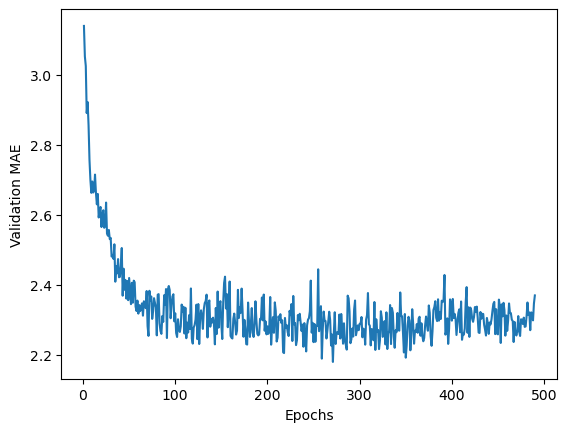

In [205]:
truncated_mae_history = average_mae_history[10:]

plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

재훈련된 모델의 테스트셋에 대한 성능을 평가하면 
주택가격 예측에 있어서 평균적으로 2.26, 즉 2,260달러 정도의 차이를 가지면
특성 `B`를 추가했을 때보다 성능이 많이 좋아진다.

앞서 확인한대로 이는 과대적합이 보다 늦게 발생하기 때문이다.
즉, 과대적합 없이 오랫동안 훈련한 모델일 수록 성능이 좋아진다.

In [207]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
test_mae_score

4/4 [==============================] - 0s 3ms/step - loss: 11.8552 - mae: 2.2617


2.2616639137268066

## 연습문제

1. [(실습) 신경망 활용 처음부터 끝까지: 분류와 회귀](https://colab.research.google.com/github/codingalzi/dlp2/blob/master/excs/exc-getting_started_with_neural_networks.ipynb)